Copyright (c) 2019 [Sebastian Raschka](sebastianraschka.com)

https://github.com/rasbt/python-machine-learning-book-3rd-edition

[MIT License](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt)

# Python. Uczenie maszynowe - kod źródłowy

# Rozdział 12. Implementowanie wielowarstwowej sieci neuronowej od podstaw


Zwróć uwagę, że rozszerzenie zawierające nieobowiązkowy znak wodny stanowi niewielki plugin notatnika IPython / Jupyter, który zaprojektowałem w celu powielania kodu źródłowego. Wystarczy pominąć poniższe wiersze kodu:

In [1]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -v -p numpy,scipy,matplotlib

Sebastian Raschka 
last updated: 2019-12-05 

CPython 3.7.1
IPython 7.10.1

numpy 1.17.4
scipy 1.3.1
matplotlib 3.1.0


*Korzystanie z rozszerzenia `watermark` nie jest obowiązkowe. Możesz je zainstalować za pomocą polecenia:*  

    conda install watermark -c conda-forge  

lub  

    pip install watermark   

*Więcej informacji znajdziesz pod adresem: https://github.com/rasbt/watermark.*

### Spis treści

- [Modelowanie złożonych funkcji przy użyciu sztucznych sieci neuronowych](#Modelowanie-złożonych-funkcji-przy-użyciu-sztucznych-sieci-neuronowych)
  - [Jednowarstwowa sieć neuronowa — powtórzenie](#Jednowarstwowa-sieć-neuronowa-—-powtórzenie)
  - [Wstęp do wielowarstwowej architektury sieci neuronowych](#Wstęp-do-wielowarstwowej-architektury-sieci-neuronowych)
  - [Aktywacja sieci neuronowej za pomocą propagacji w przód](#Aktywacja-sieci-neuronowej-za-pomocą-propagacji-w-przód)
- [Klasyfikowanie pisma odręcznego](#Klasyfikowanie-pisma-odręcznego)
  - [Zestaw danych MNIST](#Zestaw-danych-MNIST)
  - [Implementacja perceptronu wielowarstwowego](#Implementacja-perceptronu-wielowarstwowego)
- [Trenowanie sztucznej sieci neuronowej](#Trenowanie-sztucznej-sieci-neuronowej)
  - [Obliczanie logistycznej funkcji kosztu](#Obliczanie-logistycznej-funkcji-kosztu)
  - [Ujęcie intuicyjne algorytmu wstecznej propagacji](#Ujęcie-intuicyjne-algorytmu-wstecznej-propagacji)
  - [Uczenie sieci neuronowych za pomocą algorytmu propagacji wstecznej](#Uczenie-sieci-neuronowych-za-pomocą-algorytmu-propagacji-wstecznej)
- [Zbieżność w sieciach neuronowych](#Zbieżność-w-sieciach-neuronowych)
- [Podsumowanie](#Podsumowanie)

<br>
<br>

In [1]:
from IPython.display import Image
%matplotlib inline

# Modelowanie złożonych funkcji przy użyciu sztucznych sieci neuronowych

...

## Jednowarstwowa sieć neuronowa — powtórzenie

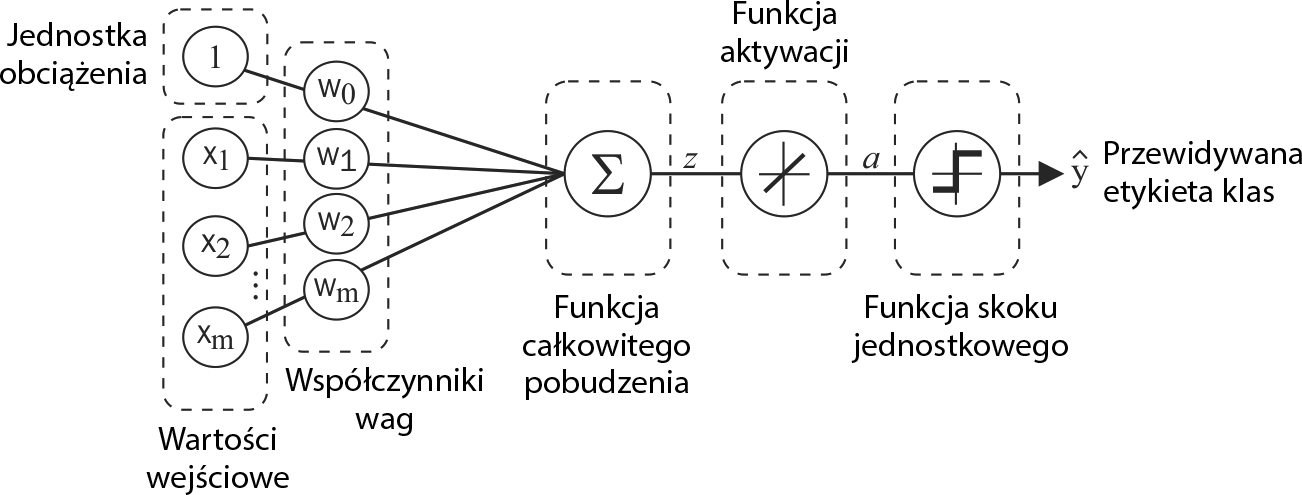

In [2]:
Image(filename='rysunki/12_01.png', width=600) 

<br>
<br>

## Wstęp do wielowarstwowej architektury sieci neuronowych

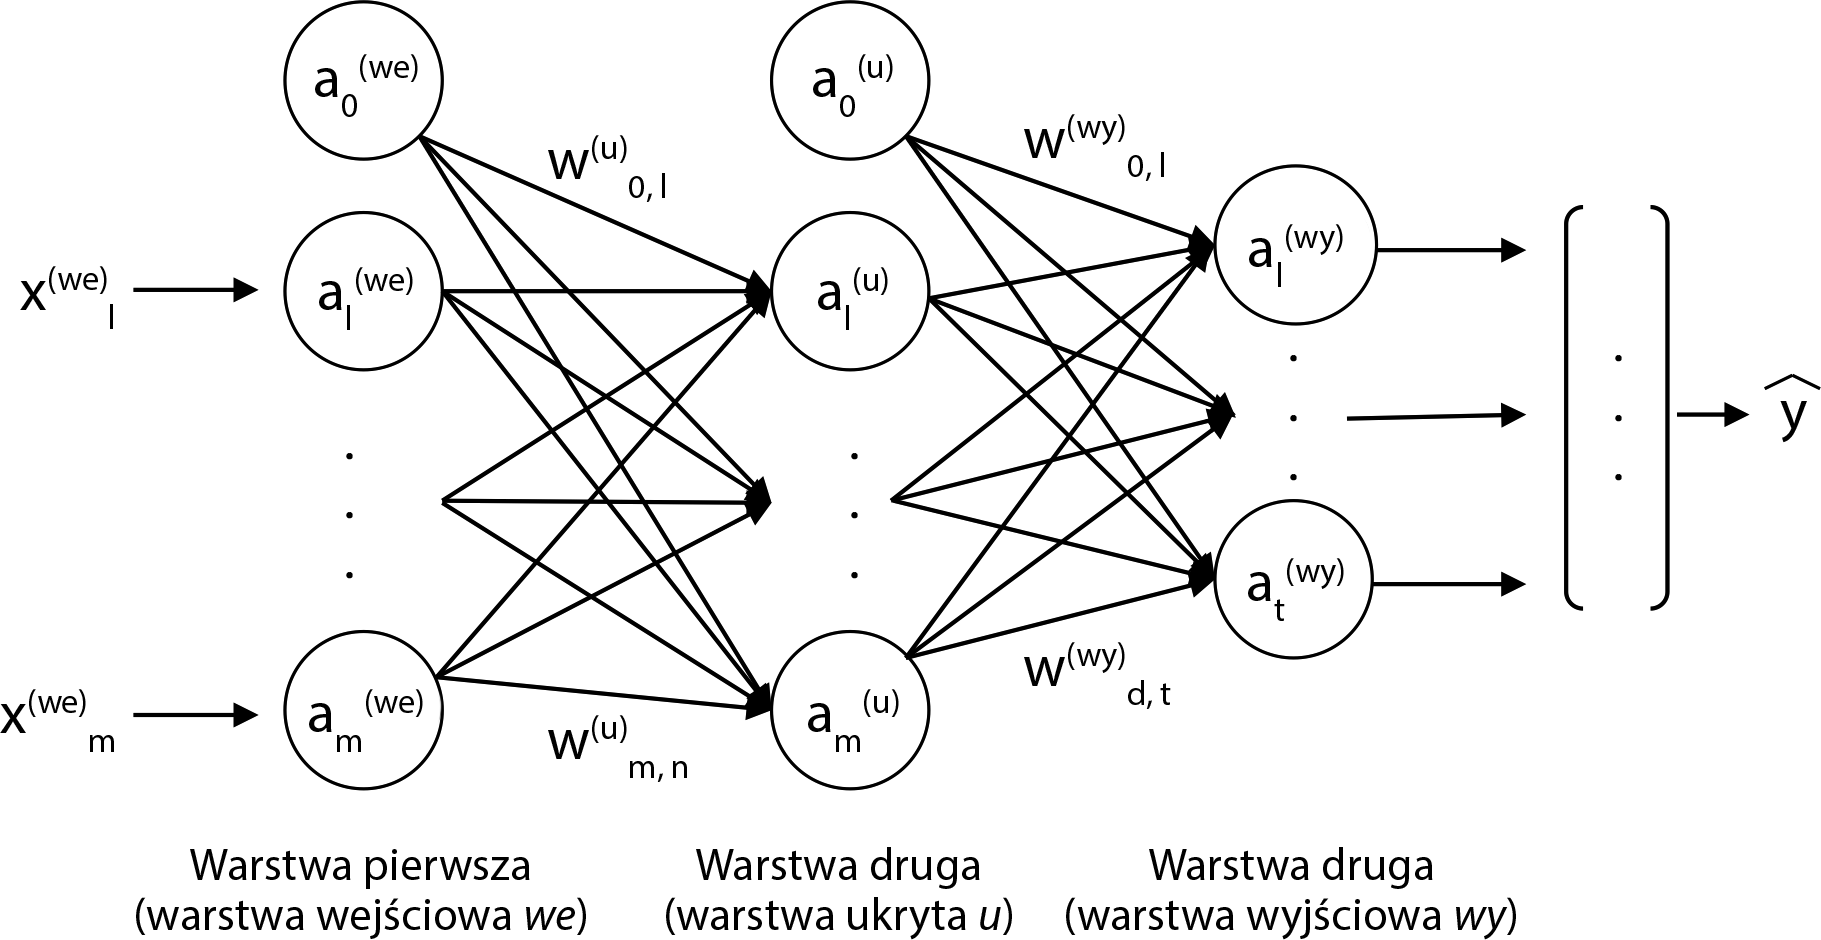

In [3]:
Image(filename='rysunki/12_02.png', width=600) 

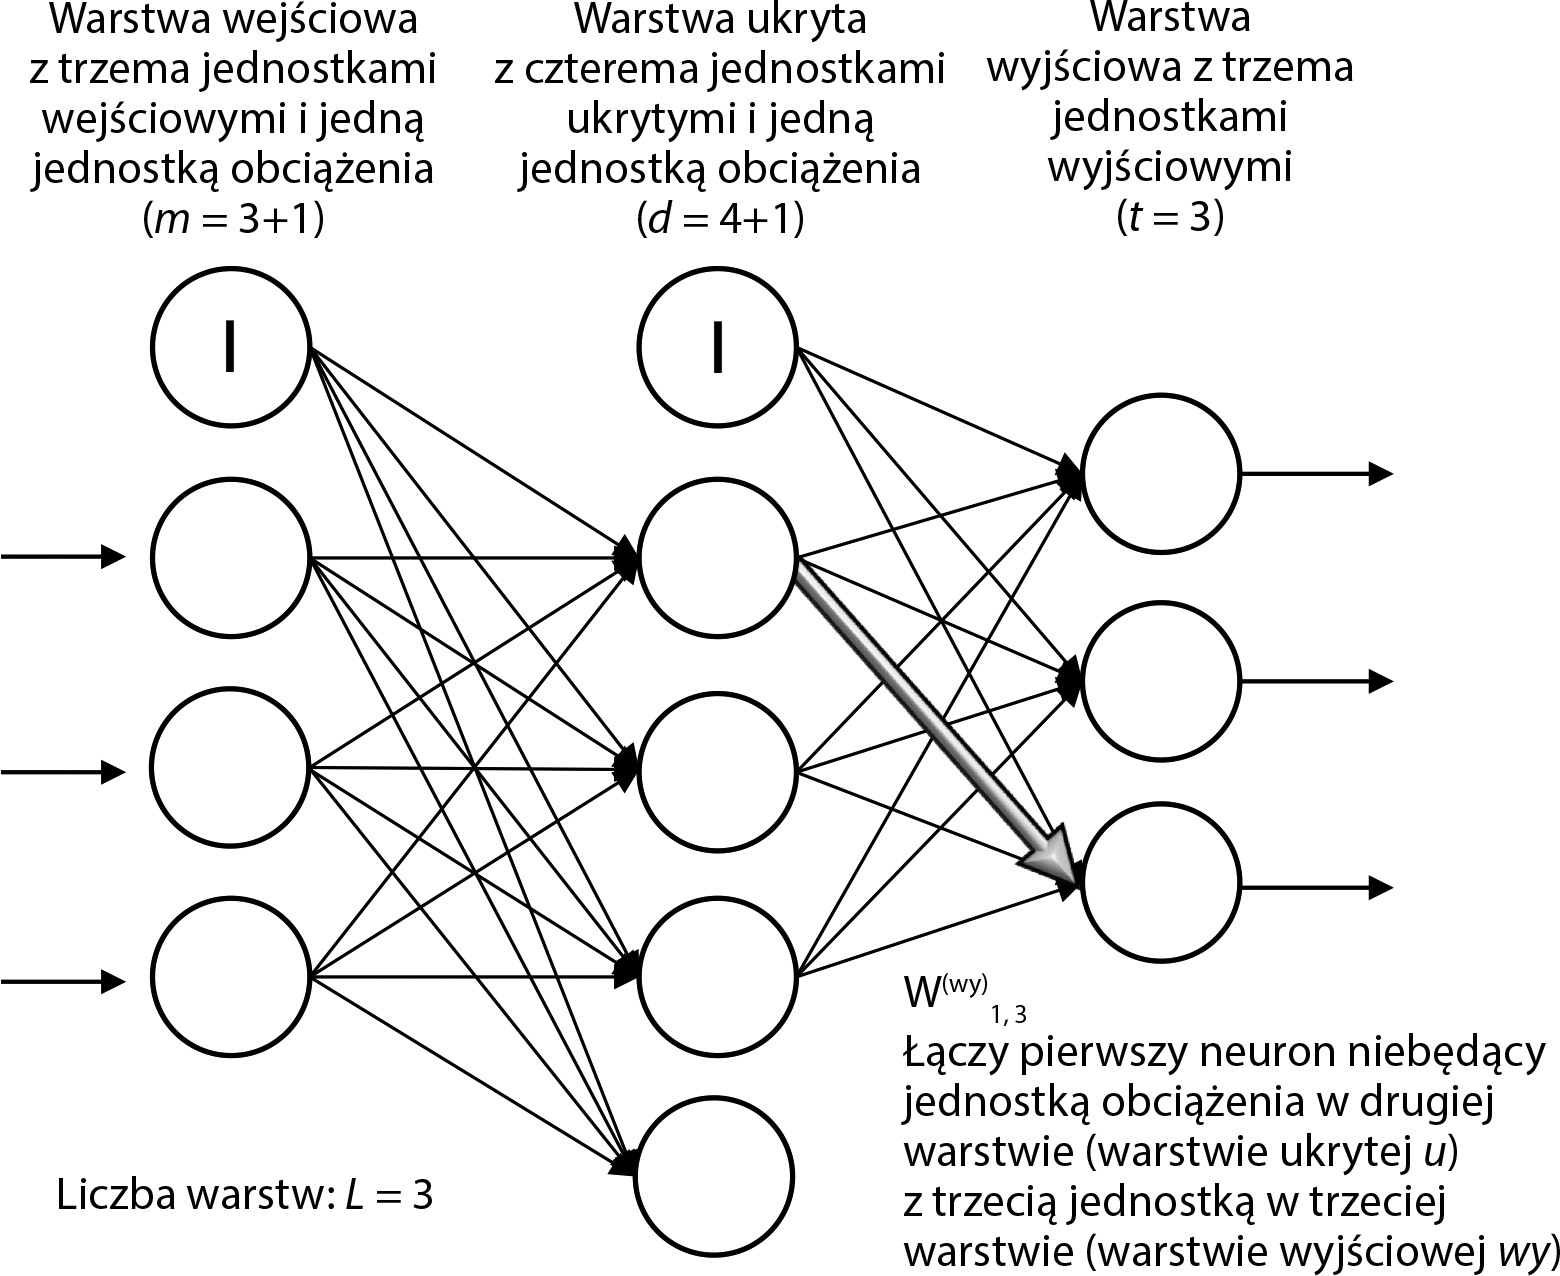

In [4]:
Image(filename='rysunki/12_03.png', width=500) 

<br>
<br>

## Aktywacja sieci neuronowej za pomocą propagacji w przód

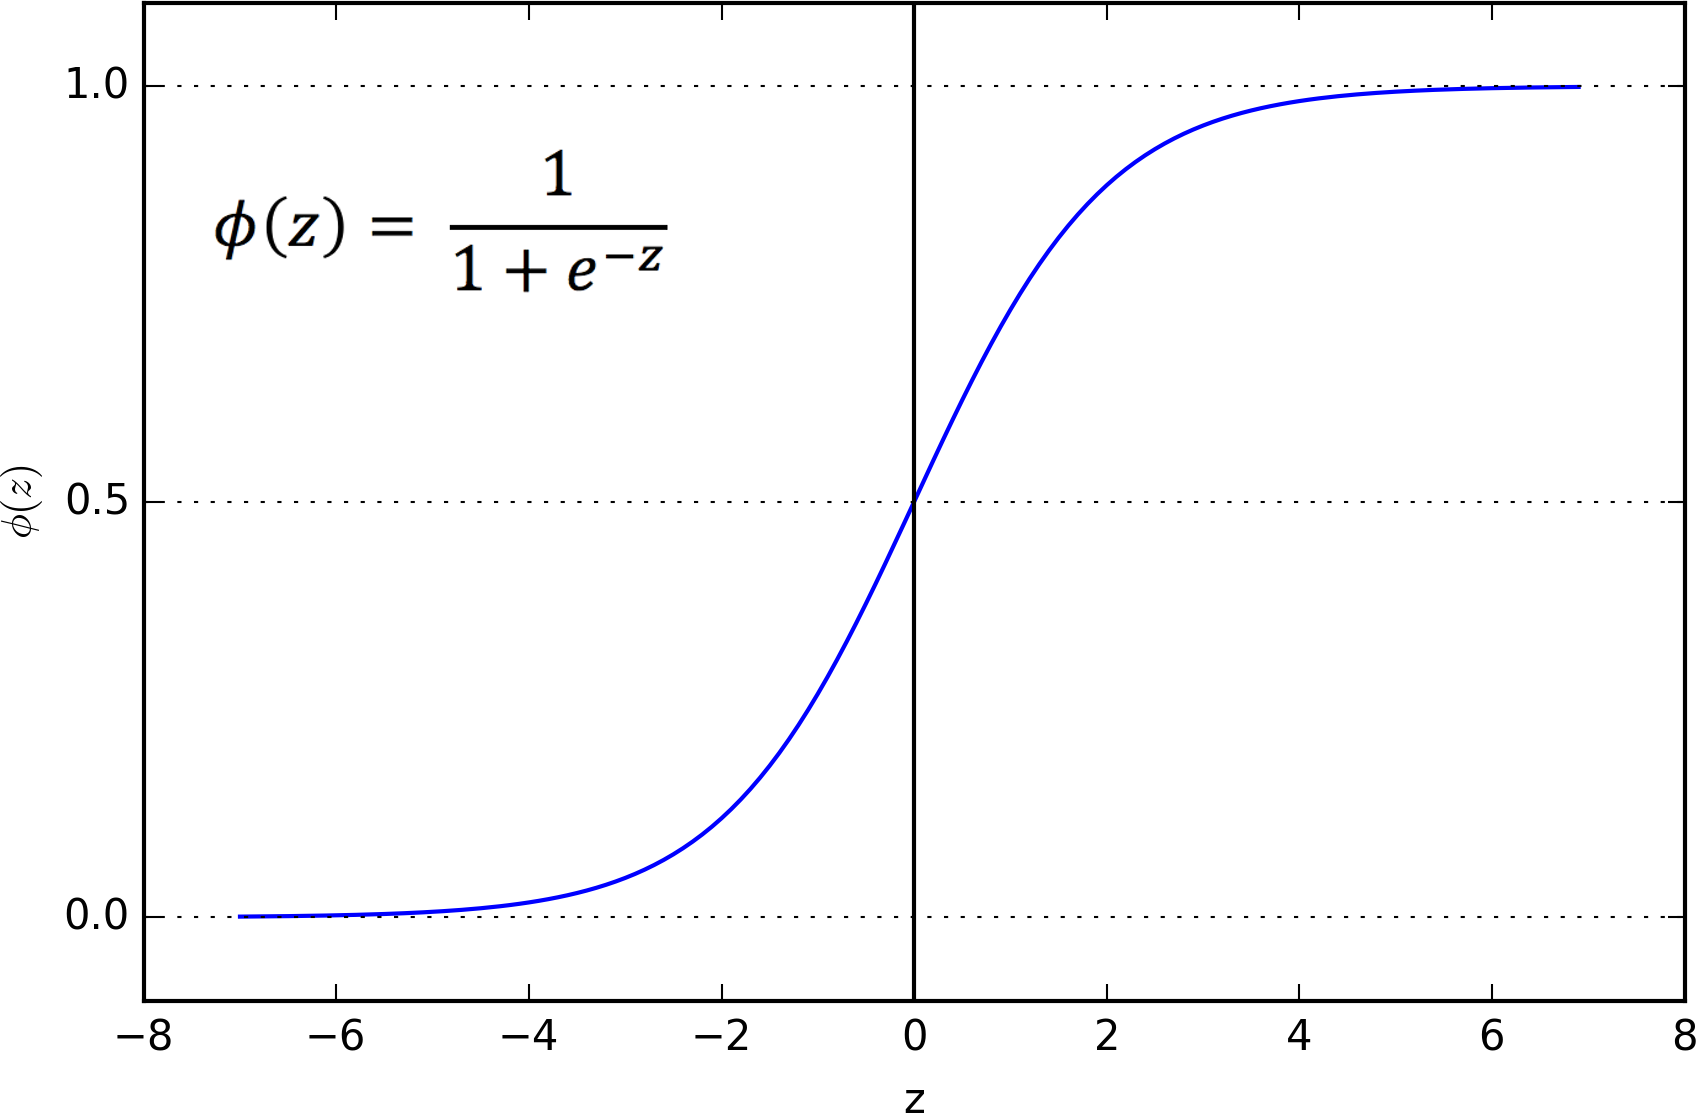

In [5]:
Image(filename='rysunki/12_04.png', width=500) 

Aby wczytać zestaw danych MNIST za pomocą interfejsu scikit-learn, usuń symbole komentarza z poniższego listingu.

In [7]:
"""
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = ((X / 255.) - .5) * 2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=123, stratify=y)
"""

"\nfrom sklearn.datasets import fetch_openml\nfrom sklearn.model_selection import train_test_split\n\n\nX, y = fetch_openml('mnist_784', version=1, return_X_y=True)\ny = y.astype(int)\nX = ((X / 255.) - .5) * 2\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=10000, random_state=123, stratify=y)\n"

<br>
<br>

# Klasyfikowanie pisma odręcznego

...

## Zestaw danych MNIST

Zestaw danych MNIST jest dostępny publicznie pod adresem http://yann.lecun.com/exdb/mnist/ i składa się z czterech części:

- zbiór obrazów uczących: train-images.idx3-ubyte.gz (spakowany plik 9,9 MB, po rozpakowaniu 47 MB; 60 000 próbek),
- zbiór etykiet zestawu uczącego: train-labels.idx1-ubyte.gz (spakowany plik 29 kB, po rozpakowaniu 60 kB; 60 000 etykiet),
- zbiór obrazów testowych: t10k-images.idx3-ubyte.gz (spakowany plik 1,6 MB; po rozpakowaniu 7,8 MB; 10 000 próbek),
- zbiór etykiet zestawu testowego: t10k-labels.idx1-ubyte.gz (spakowany plik 5 kB; po rozpakowaniu 10 kB; 10 000 etykiet).

Będziemy korzystać jedynie z podzbioru uczącego zestawu MNIST, dlatego wystarczy pobrać zbiór obrazów uczących i zbiór etykiet zestawu uczącego. 

Po pobraniu archiwów uruchom poniższą komórkę, aby je rozpakować.



In [8]:
# ta komórka rozpakowuje archiwa zestawu danych MNIST

import sys
import gzip
import shutil
import os

if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir() if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read()) 

----

ZIGNORUJ, JEŚLI POWYŻSZA KOMÓRKA DZIAŁA U CIEBIE PRAWIDŁOWO:
    
Jeżeli masz problem z działaniem powyższej komórki, zalecam rozpakowanie plików za pomocą narzędzia gzip (użytkownicy Uniksa / Linuksa) z poziomu terminalu — wystarczy użyć poniższego polecenia w katalogu zawierającym pliki MNIST: 

    gzip *ubyte.gz -d
 
Z kolei osoby pracujące w systemie Windows mogą użyć dowolnego archiwizatora do rozpakowania tych plików. Obrazy są przechowywane w formacie bajtowym i będziemy je wczytywać do tablic NumPy, które następnie posłużą nam do uczenia i testowania implementacji MLP.

Jeżeli **nie** korzystasz z aplikacji gzip, upewnij się, że pliki będą nosić następujące nazwy:

- train-images-idx3-ubyte
- train-labels-idx1-ubyte
- t10k-images-idx3-ubyte
- t10k-labels-idx1-ubyte

Jeżeli plik będzie miał po rozpakowaniu nazwę np. `train-images.idx3-ubyte` (wynika to z faktu, że niektóre narzędzia starają się "odgadnąć" rozszerzenie pliku), zmień ją w następujący sposób: `train-images-idx3-ubyte`. 

----

In [9]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """Wczytuje dane MNIST umieszczone w katalogu roboczym"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels

In [10]:
!ls

README.md                  t10k-images-idx3-ubyte.gz
ch12.ipynb                 t10k-labels-idx1-ubyte
ch12.py                    t10k-labels-idx1-ubyte.gz
images                     train-images-idx3-ubyte
mnist_scaled.npz           train-images-idx3-ubyte.gz
neuralnet.py               train-labels-idx1-ubyte
t10k-images-idx3-ubyte     train-labels-idx1-ubyte.gz


In [11]:
X_train, y_train = load_mnist('', kind='train')
print('Rzędy: %d, Kolumny: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [12]:
X_test, y_test = load_mnist('', kind='t10k')
print('Rzędy: %d, Kolumny: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


Wyświetla pierwszą cyfrę z każdej klasy:

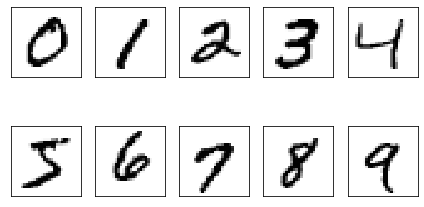

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('rysunki/12_5.png', dpi=300)
plt.show()

Wyświetla 25 wersji cyfry "7":

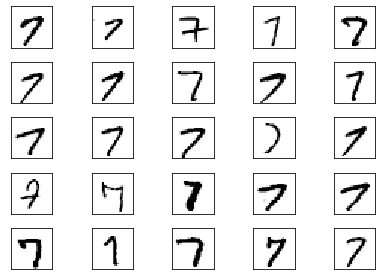

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('rysunki/12_6.png', dpi=300)
plt.show()

In [15]:
import numpy as np

np.savez_compressed('mnist_scaled.npz', 
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [16]:
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [17]:
X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train', 
                                    'X_test', 'y_test']]

del mnist

X_train.shape

(60000, 784)

<br>
<br>

## Implementacja perceptronu wielowarstwowego

In [11]:
import numpy as np
import sys


class NeuralNetMLP(object):
    """ Sieć neuronowa z dodatnim sprzężeniem zwrotnym / klasyfikator – perceptron wielowarstwowy.

    Parametry
    ------------
    n_hidden : liczba całkowita (domyślnie: 30)
          Liczba jednostek ukrytych.
    l2 : wartość zmiennoprzecinkowa (domyślnie: 0.0)
          Parametr lambda regularyzacji L2.
          Nie ma regularyzacji, jeśli l2=0.0 (domyślnie)
    epochs : liczba całkowita (domyślnie: 500)
          Liczba przebiegów po zestawie danych uczących.
    eta : wartość zmiennoprzecinkowa (domyślnie: 0.001)
          Współczynnik uczenia.
    shuffle : typ boolowski (domyślnie: True)
          Jeżeli wartość jest równa "True", tasuje dane uczące po każdej epoce
          w celu uniknięcia cykliczności.
    minibatch_size : liczba całkowita (domyślnie: 1)
          Liczba przykładów uczących na daną mini-grupę.
    seed : liczba całkowita (domyślnie: None)
          Ziarno losowości używane podczas tasowania i inicjowania wag.

    Atrybuty
    -----------
    eval_: słownik
          Słownik przechowujący wartości kosztu, dokładności uczenia i dokładności
          walidacji dla każdej epoki podczas uczenia.

    """

    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Koduje etykiety do postaci "gorącojedynkowej"

        Parametry
        ------------
        y : tablica, wymiary = [n_próbek]
            Wartości docelowe.

        Zwraca
        -----------
        onehot : tablica, wymiary = (n_etykiet, n_próbek)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Oblicza funkcję logistyczną (sigmoidalną)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Oblicza krok propagacji w przód"""

        # Etap 1.: Pobudzenie całkowite warstwy ukrytej
        # [n_próbek, n_cech] dot [n_cech, n_hidden]
        # -> [n_próbek, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # Etap 2.: Aktywacja warstwy ukrytej
        a_h = self._sigmoid(z_h)

        # Etap 3.: Całkowite pobudzenie warstwy wyjściowej
        # [n_próbek, n_hidden] dot [n_hidden, n_etykiet_klas]
        # -> [n_próbek, n_etykiet_klas]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # Etap 4.: Aktywacja warstwy wyjściowej
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Oblicza funkcję kosztu.

        Parametry
        ----------
        y_enc : tablica,wymiary = (n_etykiet, n_próbek)
            Etykiety klas zakodowane do postaci "gorącojedynkowej".
        output : tablica, wymiary = [n_próbek, n_jednostek_wyjściowych]
            Aktywacja warstwy wyjściowej (propagacja w przód).

        Zwraca
        ---------
        cost : wartość zmiennoprzecinkowa
            Regularyzowana funkcja kosztu.

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term

        # Jeżeli będziesz stosować tę funkcję kosztu do innych zestawów danych,
        # w których wartości aktywacji mogą przyjmować skrajniejsze
        # wartości (bliższe 0 lub 1), możesz natrafić na błąd
        # "ZeroDivisionError" z powodu niestabilności numerycznej
        # bieżących implementacji języka Python i biblioteki NumPy.
        # Przykładowo, algorytm stara się obliczyć log(0), czyli niezdefiniowaną wartość.
        # Aby rozwiązać ten problem, możesz dodać niewielką stałą
        # do wartości aktywacji; stała ta zostanie dodana do funkcji logarytmicznej.
        #
        # Na przykład:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)

        return cost

    def predict(self, X):
        """Prognozowanie etykiet klas

        Parametry
        -----------
        X : tablica, wymiary = [n_próbek, n_cech]
            Warstwa wejściowa z pierwotnymi cechami.

        Zwraca:
        ----------
        y_pred : tablica, wymiary = [n_próbek]
            Przewidywane etykiety klas.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Aktualizuje wagi za pomocą danych uczących.

        Parametry
        -----------
        X_train : tablica, wymiary = [n_próbek, n_cech]
            Warstwa wejściowa zawierająca pierwotne cechy.
        y_train : tablica, wymiary = [n_próbek]
            Docelowe etykiety klas.
        X_valid : tablica, wymiary = [n_próbek, n_cech]
            Przykładowe cechy służące do walidacji w trakcie uczenia.
        y_valid : tablica, wymiary = [n_próbek]
            Przykładowe etykiety służące do walidacji w trakcie uczenia.

        Zwraca:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Inicjowanie wag
        ########################

        # wagi pomiędzy warstwą wejściową a ukrytą
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # wagi pomiędzy warstwą ukrytą a wyjściową
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # formatowanie paska postępów
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # przebiegi po epokach uczenia
        for i in range(self.epochs):

            # przebiegi po mini-grupach
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # propagacja w przód
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Propagacja wsteczna
                ##################

                # [n_próbek, n_etykiet_klas]
                sigma_out = a_out - y_train_enc[batch_idx]

                # [n_próbek, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_próbek, n_etykiet_klas] dot [n_ etykiet_klas, n_hidden]
                # -> [n_ próbek, n_hidden]
                sigma_h = (np.dot(sigma_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_cech, n_ próbek] dot [n_ próbek, n_hidden]
                # -> [n_cech, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis=0)

                # [n_hidden, n_ próbek] dot [n_ próbek, n_etykiet_klas]
                # -> [n_hidden, n_ etykiet_klas]
                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis=0)

                # Regularyzacja i aktualizowanie wag
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h  # obciążenie nie jest regularyzowane
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # obciążenie nie jest regularyzowane
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Ewaluacja
            #############

            # Ewaluacja po każdej epoce w trakcie uczenia
            z_h, a_h, z_out, a_out = self._forward(X_train)
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Koszt: %.2f '
                             '| Dokładność uczenia/walidacji: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

In [19]:
n_epochs = 200

## @Czytelniku: ZIGNORUJ NINIEJSZĄ INSTRUKCJĘ IF
##
## Instrukcja ta zmniejsza jedynie liczbę epok podczas
## używania notatnika na platformie Travis Continuous Integration
## w celu testowania kodu na mniejszym zestawie danych, co
## pozwala unikać błędów przekroczenia czasu; traktuj ją jako narzędzie do usuwania błędów

if 'TRAVIS' in os.environ:
    n_epochs = 20

In [20]:
nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:55000], 
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])

200/200 | Cost: 5065.78 | Train/Valid Acc.: 99.28%/97.98%  

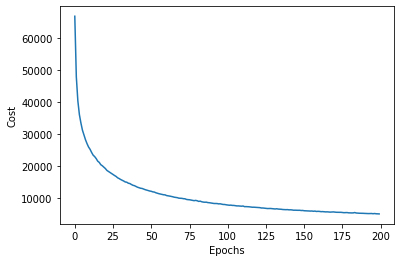

In [21]:
import matplotlib.pyplot as plt


plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Koszt')
plt.xlabel('Epoki')
#plt.savefig('rysunkis/12_07.png', dpi=300)
plt.show()

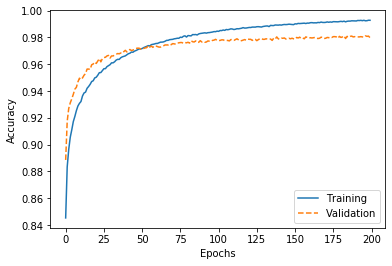

In [22]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], 
         label='Zestaw uczący')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], 
         label='Zestaw walidacyjny', linestyle='--')
plt.ylabel('Dokładność')
plt.xlabel('Epoki')
plt.legend(loc='lower right')
#plt.savefig('rysunki/12_08.png', dpi=300)
plt.show()

In [23]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred)
       .astype(np.float) / X_test.shape[0])

print('Dokładność dla danych testowych: %.2f%%' % (acc * 100))

Test accuracy: 97.54%


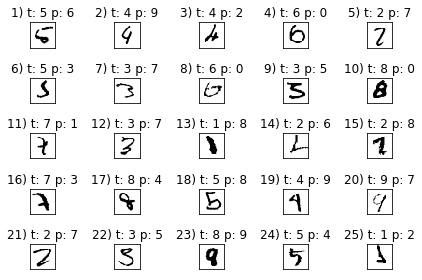

In [24]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) r: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('rysunki/12_09.png', dpi=300)
plt.show()

<br>
<br>

# Trenowanie sztucznej sieci neuronowej

...

## Obliczanie logistycznej funkcji kosztu

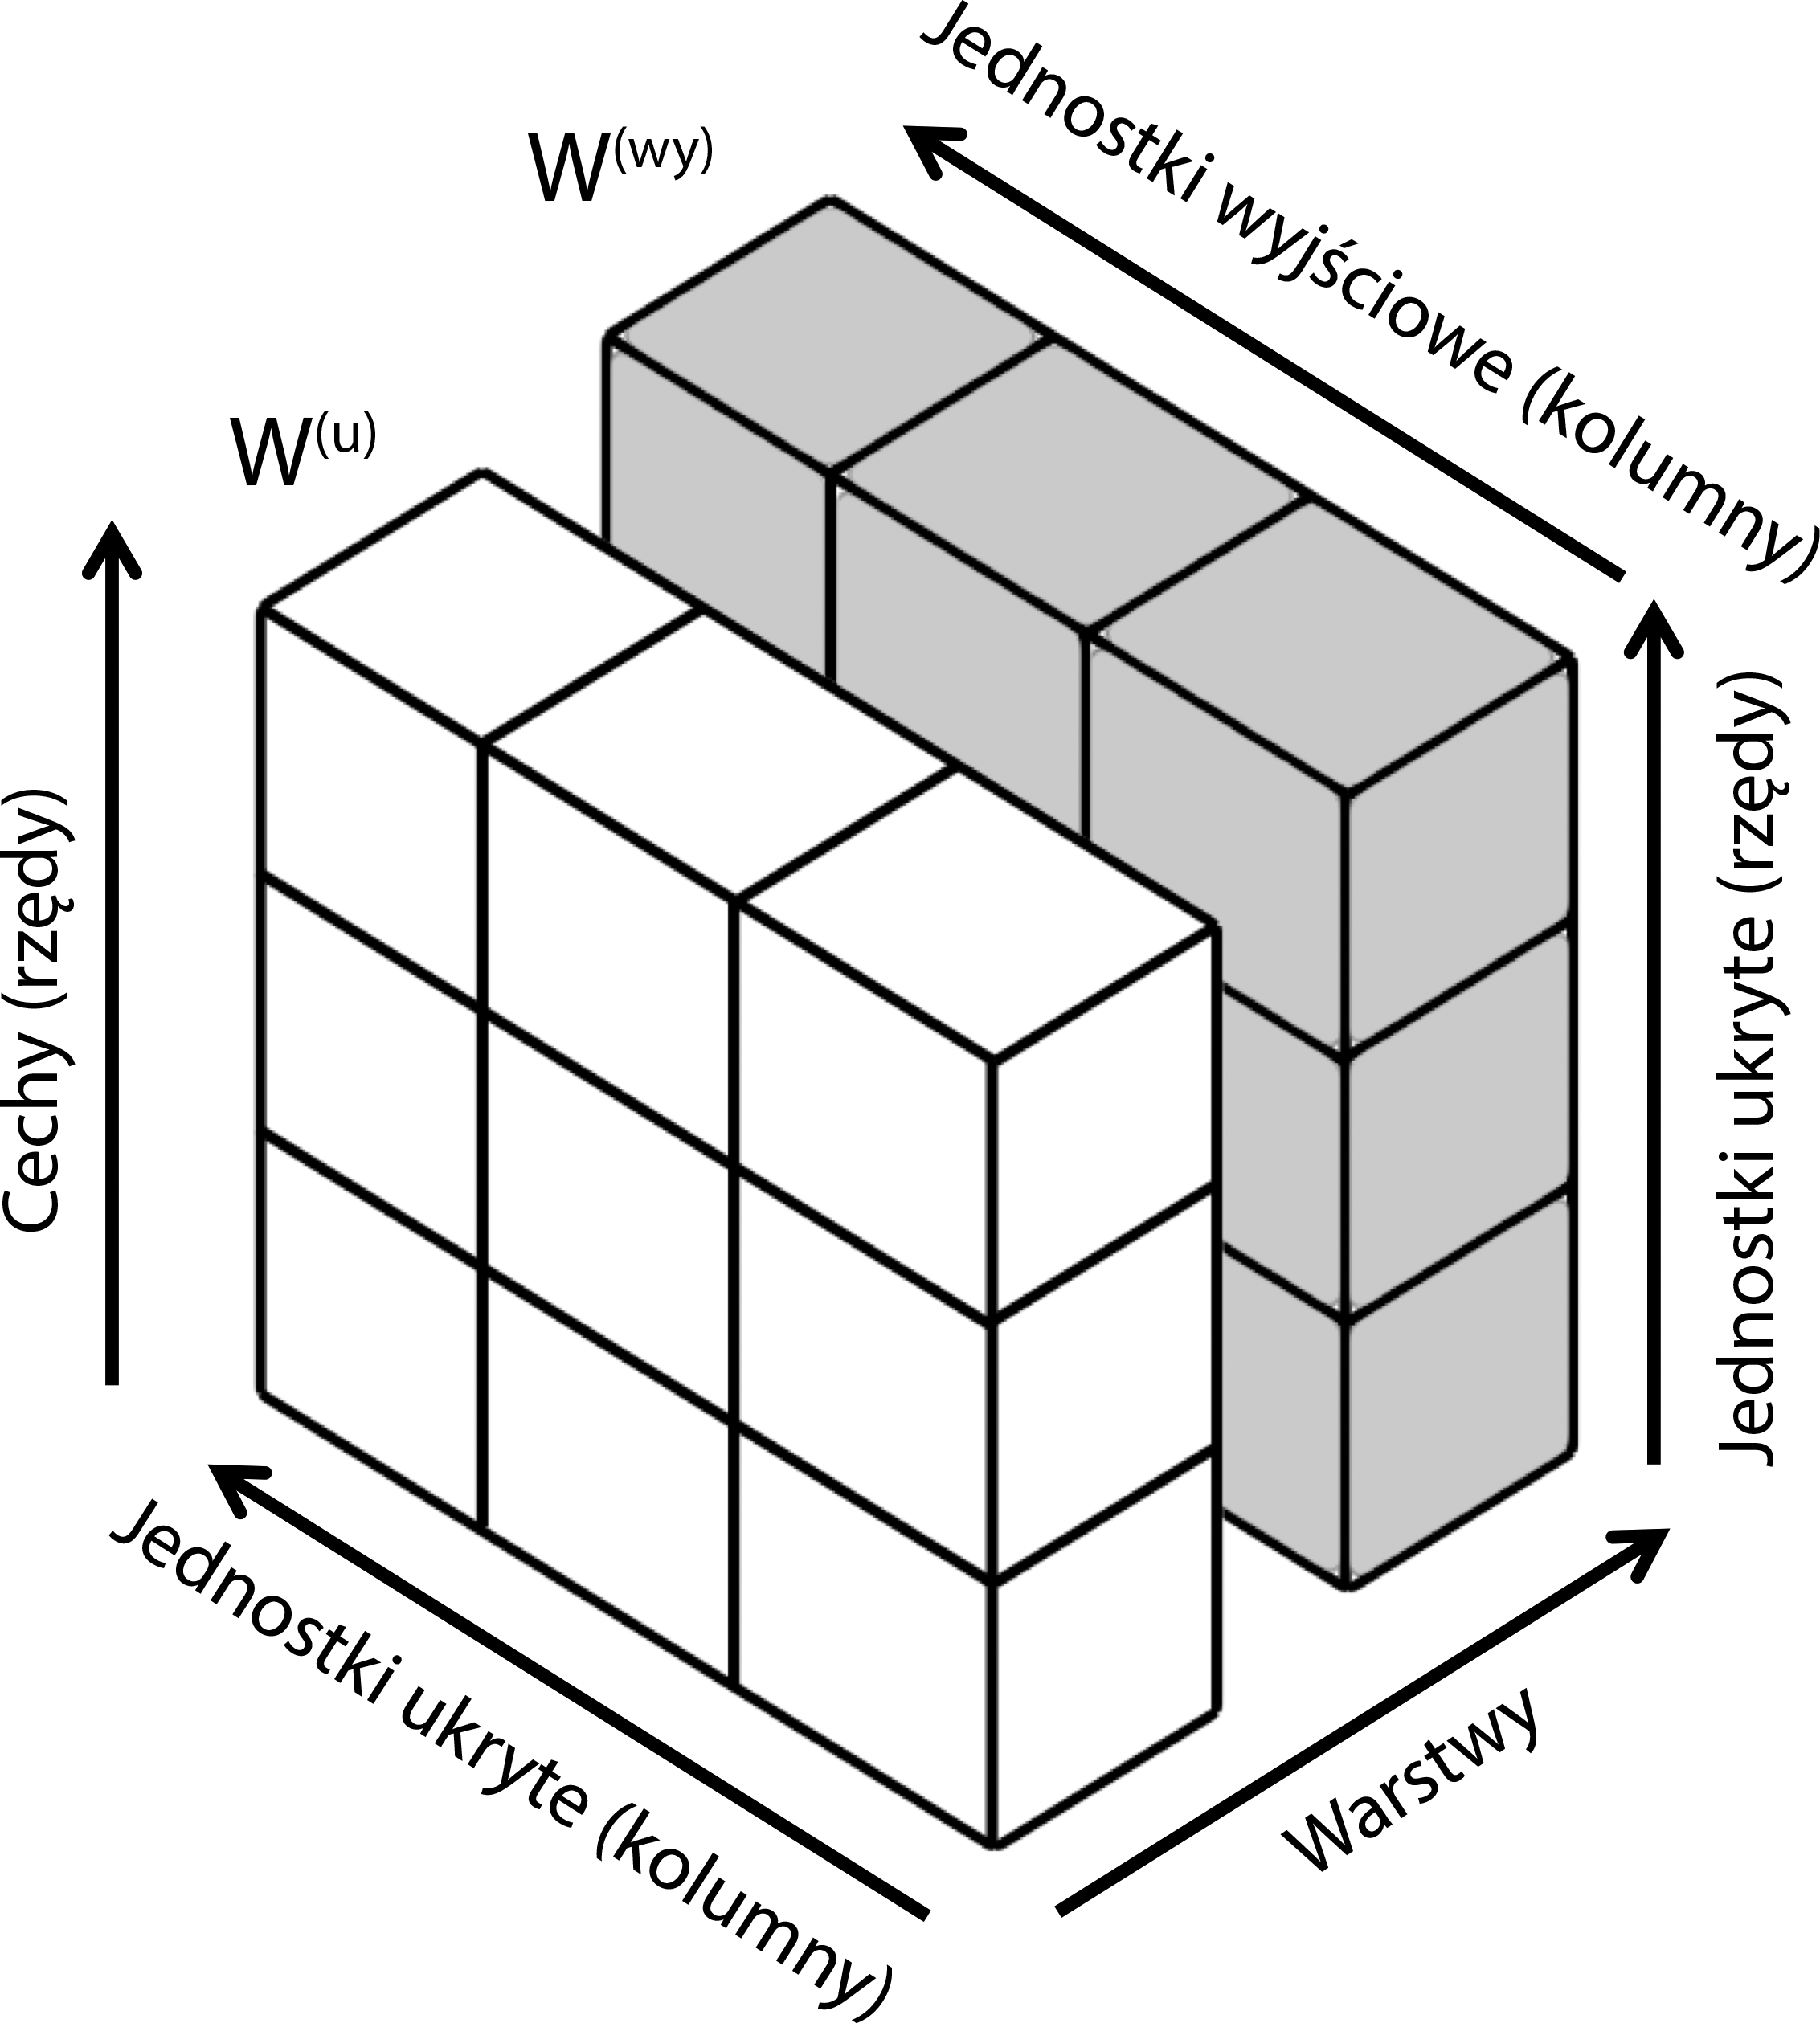

In [6]:
Image(filename='rysunki/12_10.png', width=300) 

<br>
<br>

## Ujęcie intuicyjne algorytmu wstecznej propagacji

...

## Uczenie sieci neuronowych za pomocą algorytmu propagacji wstecznej

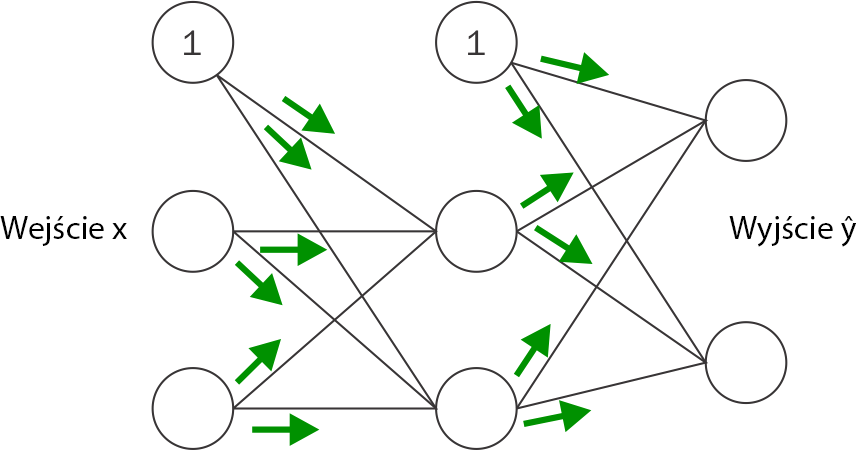

In [7]:
Image(filename='./rysunki/12_11.png', width=400) 

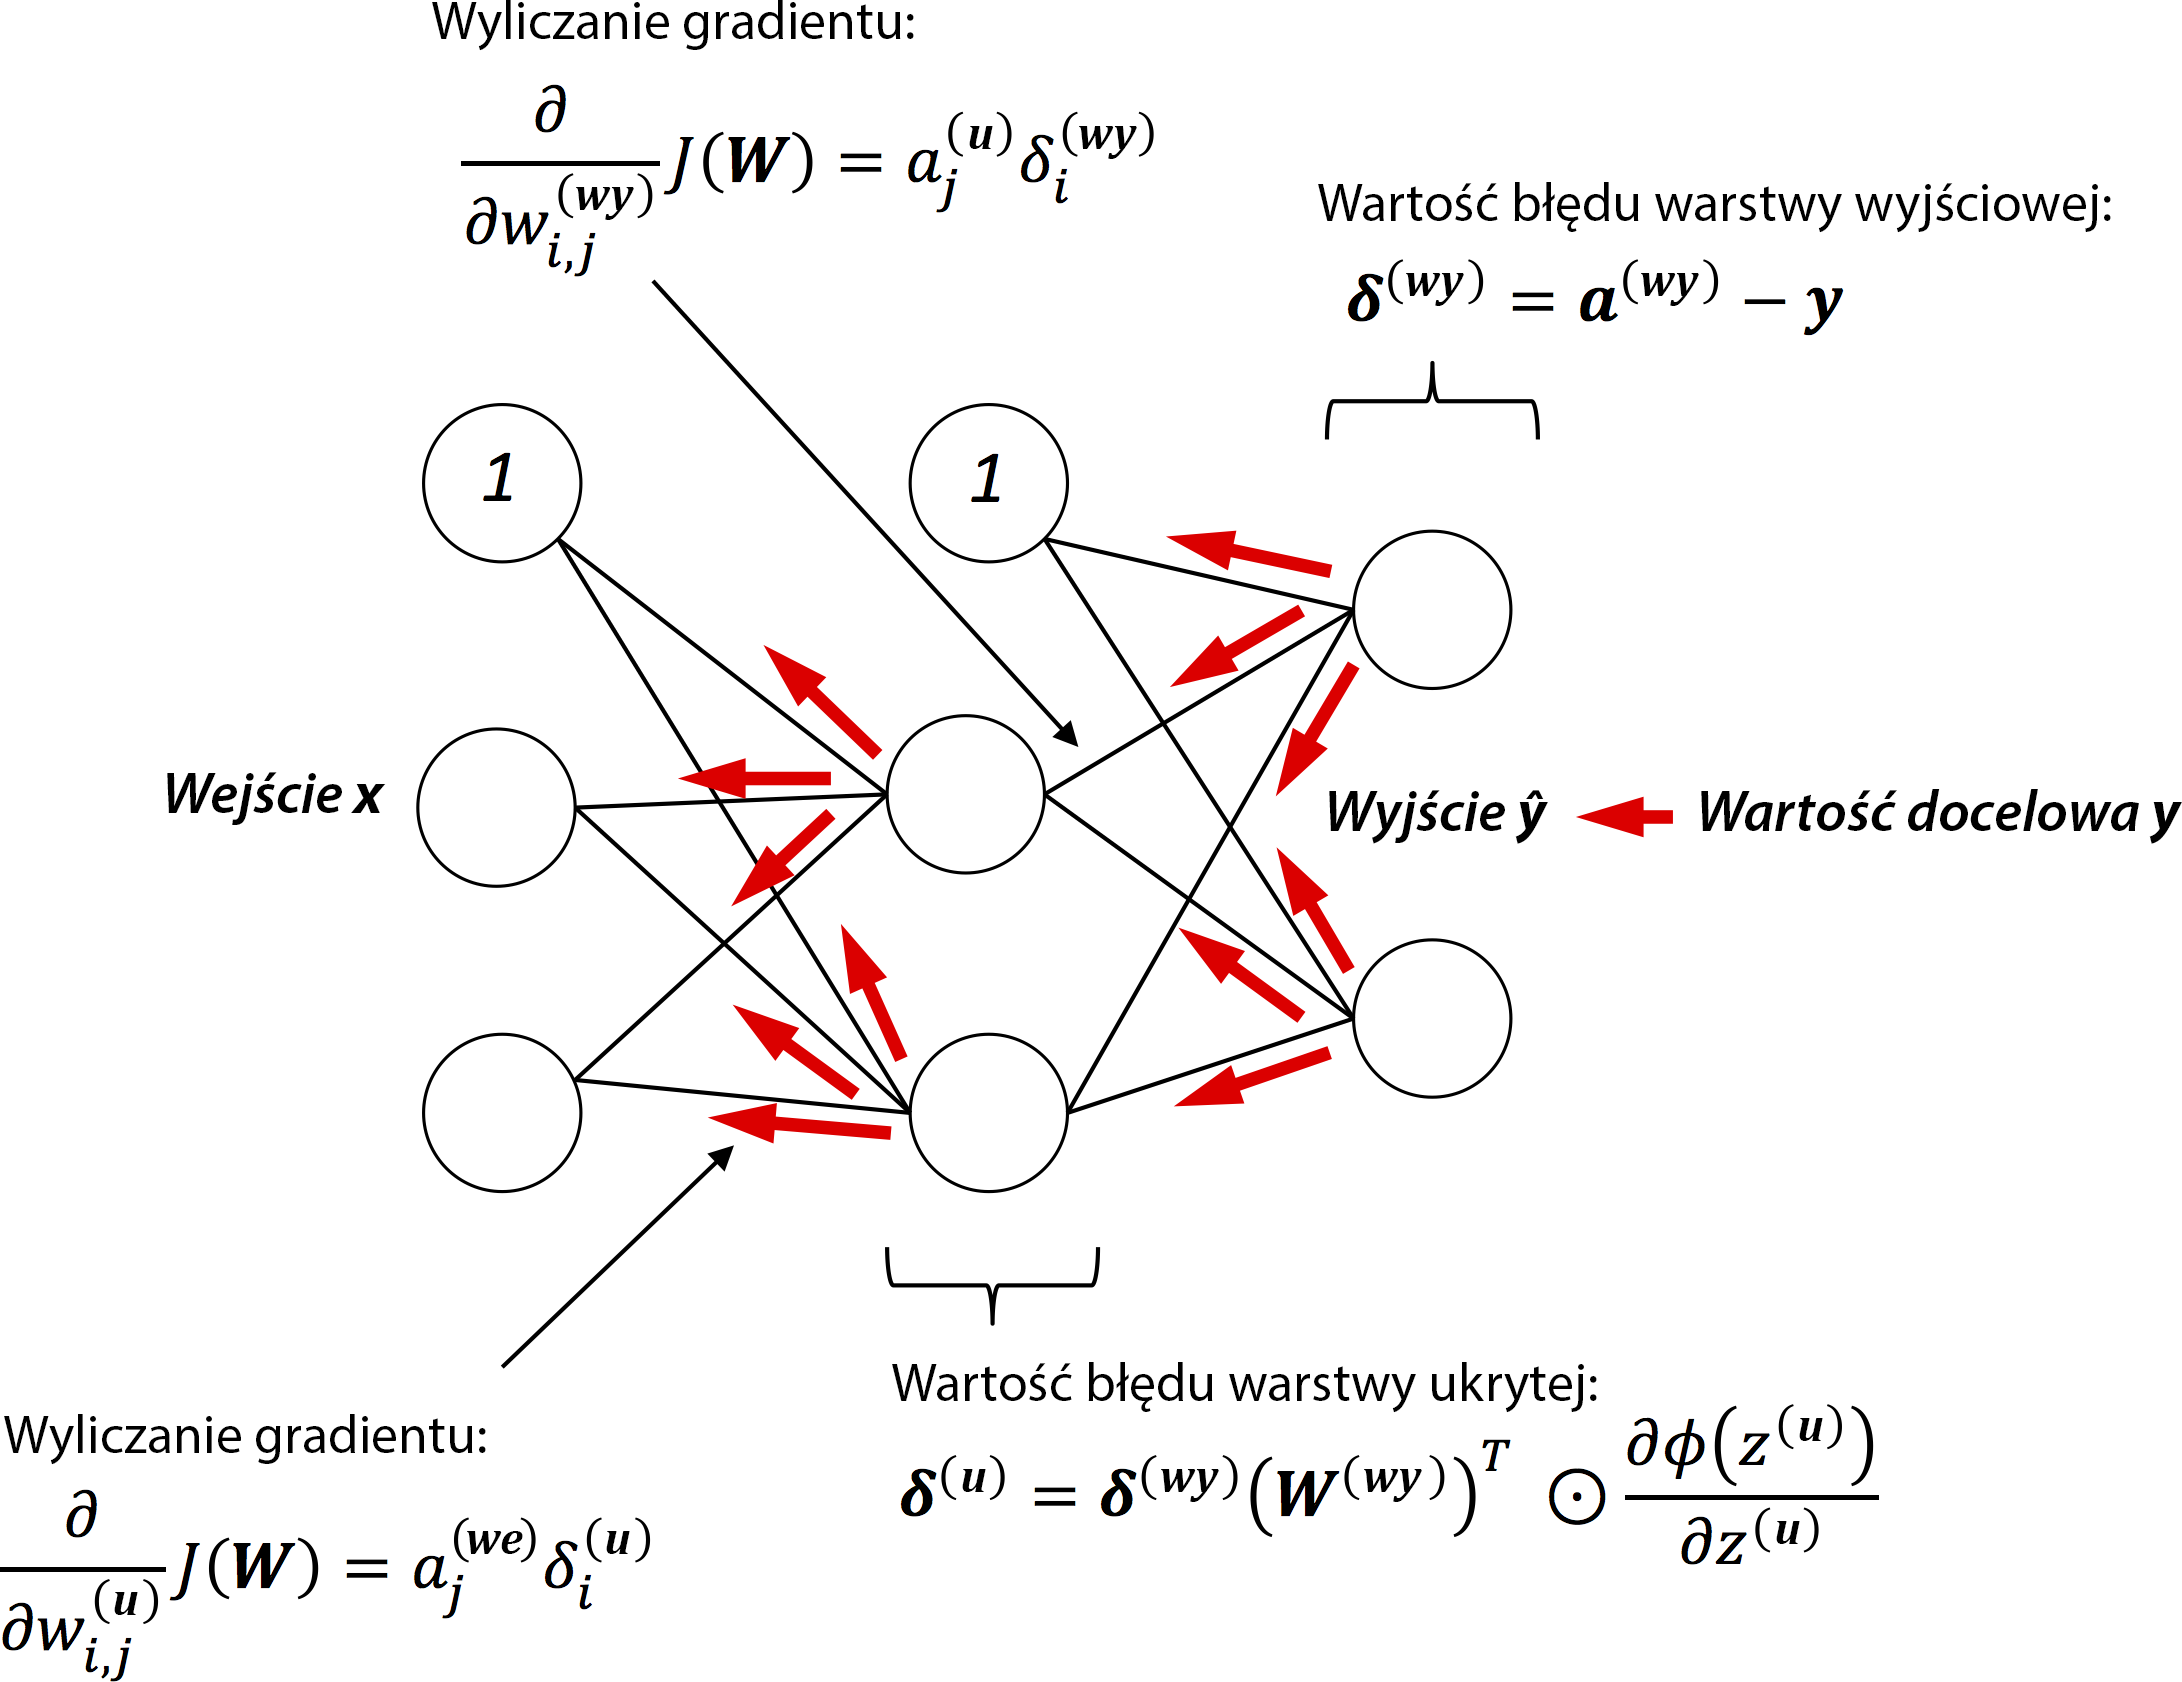

In [8]:
Image(filename='./rysunki/12_12.png', width=500) 

<br>
<br>

# Zbieżność w sieciach neuronowych

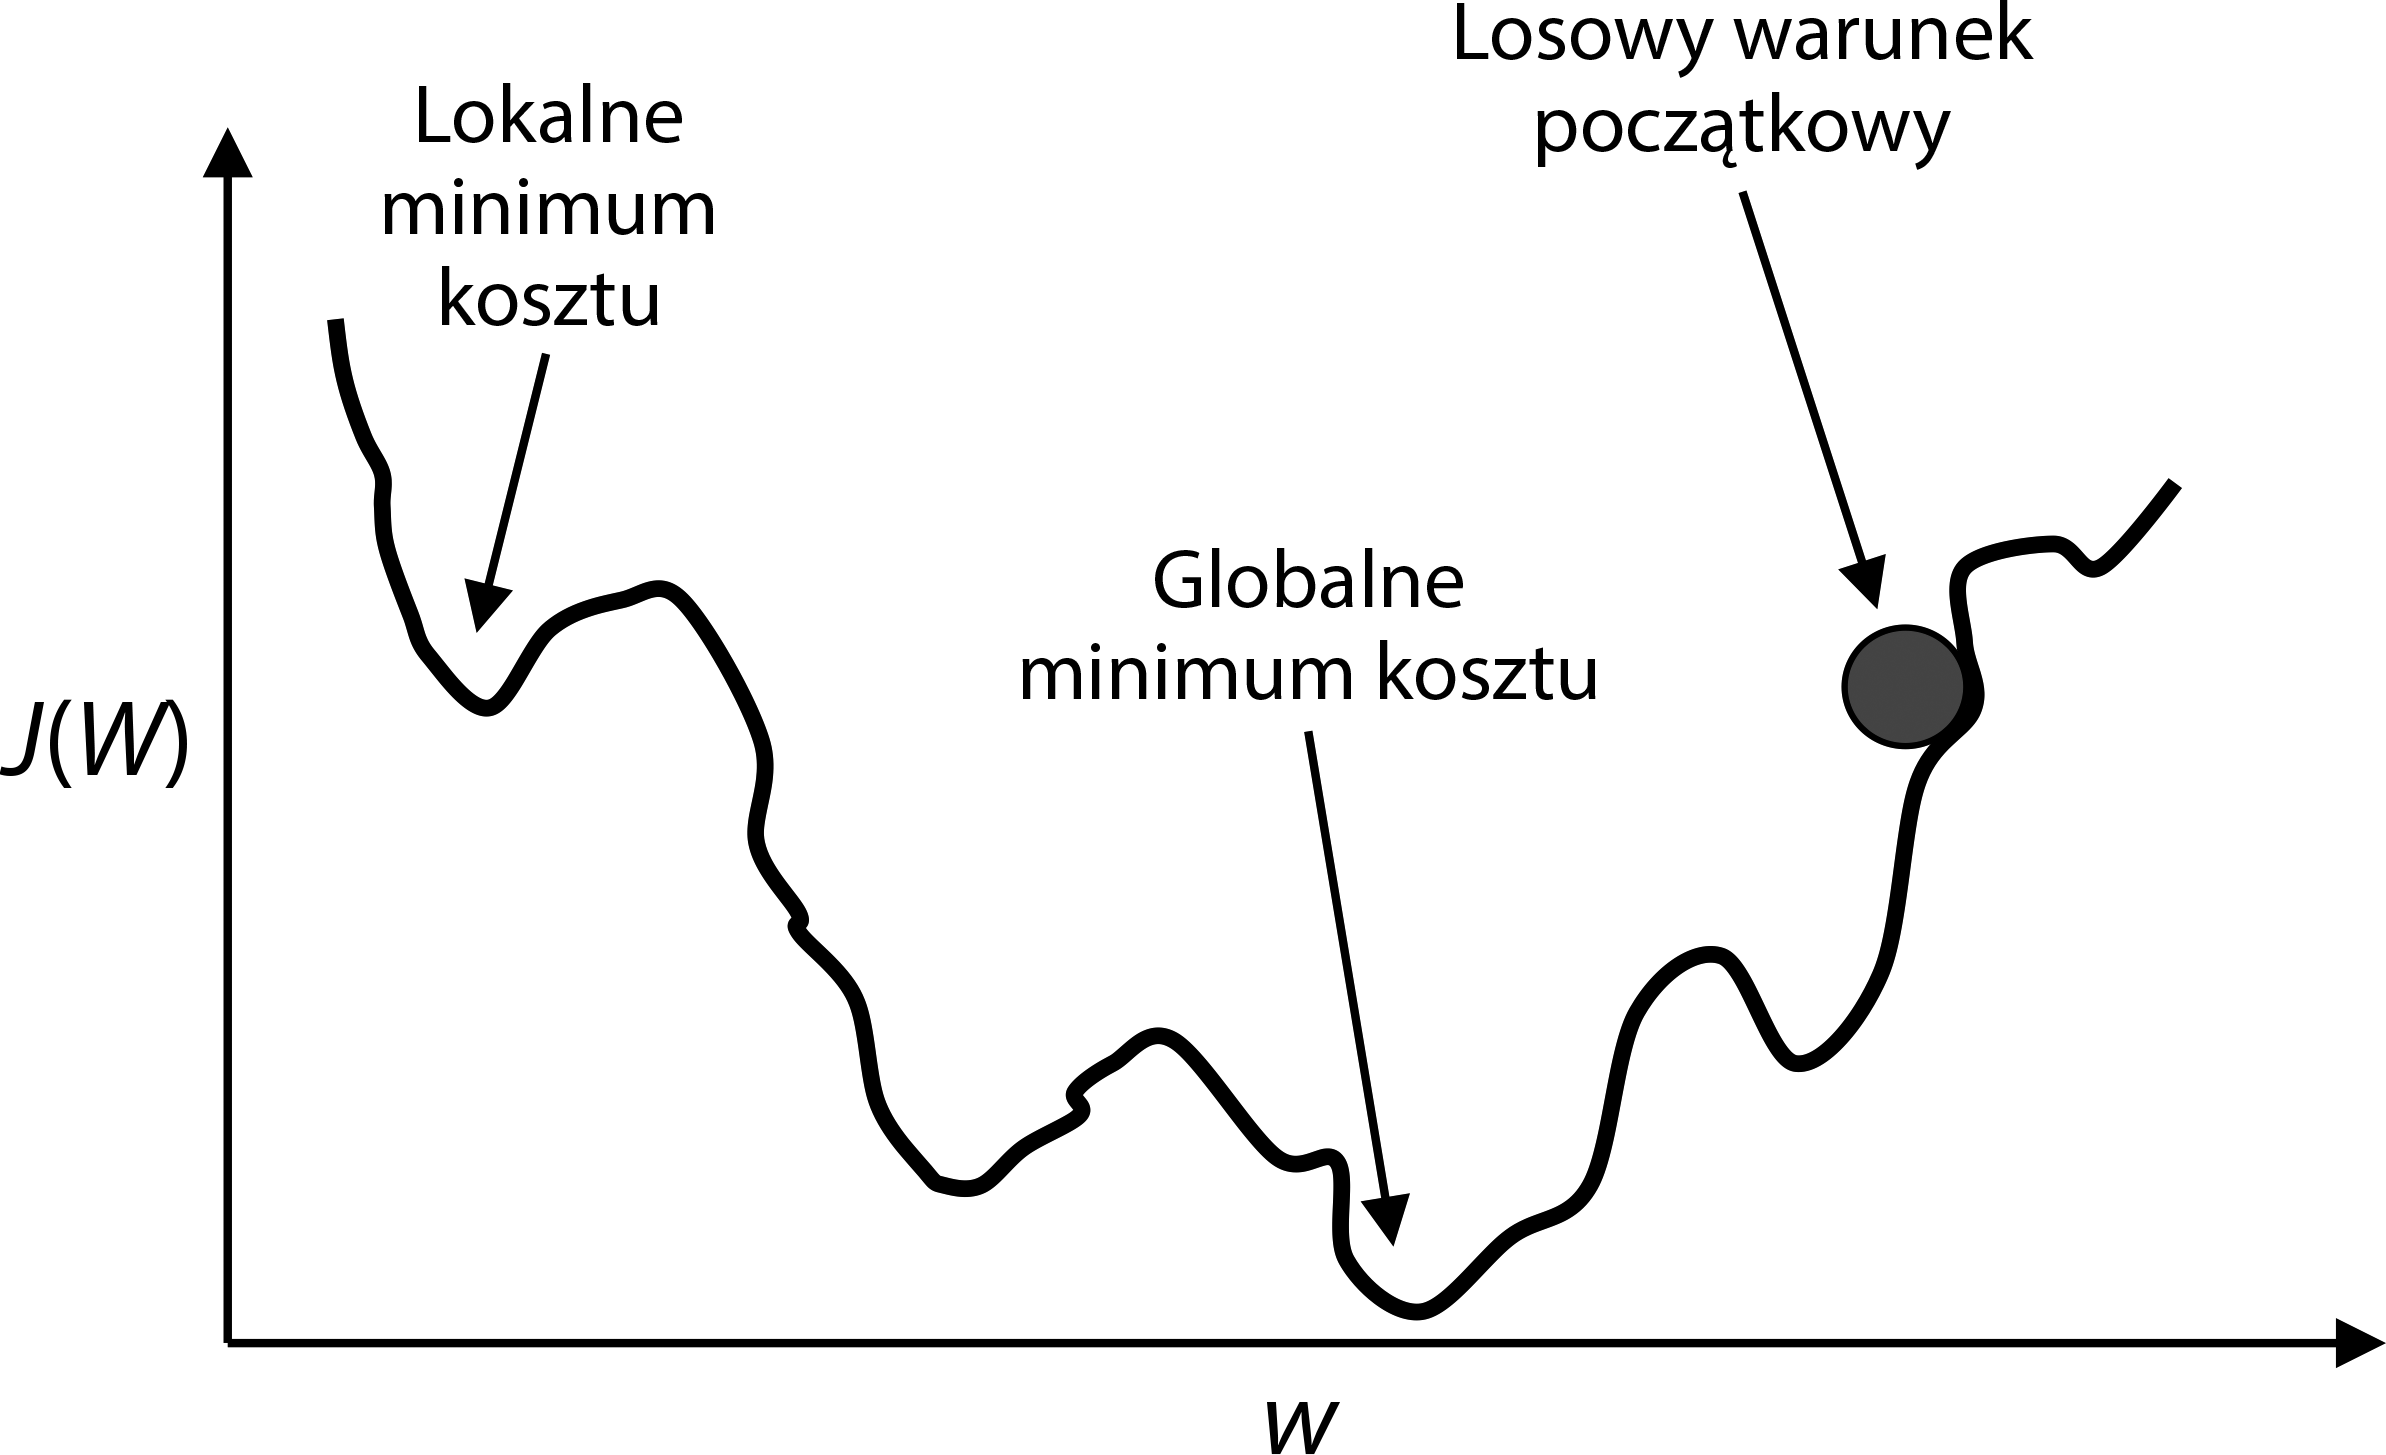

In [9]:
Image(filename='rysunki/12_13.png', width=500) 

<br>
<br>

...

# Podsumowanie

...

---

Czytelnicy mogą zignorować poniższą komórkę.

In [29]:
! python ../.convert_notebook_to_script.py --input r12.ipynb --output r12.py

[NbConvertApp] Converting notebook ch12.ipynb to script
[NbConvertApp] Writing 19664 bytes to ch12.py
